In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import joblib

import spacy
import contractions
import string
import re
from bs4 import BeautifulSoup
from unidecode import unidecode
import nltk
import swifter
from nltk.corpus import stopwords
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('omw-1.4')

from sklearn.pipeline import Pipeline
from transformers import AutoTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix , classification_report, ConfusionMatrixDisplay
from multiprocessing import Pool
from sklearn.feature_extraction.text import HashingVectorizer


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV


In [2]:
df = pd.read_csv('C:/Users/outlul/Desktop/Πτυχιακη/Code/Datasets/WELFake_Cleaned.csv')

In [3]:
df.dropna(inplace=True)

In [4]:
X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71341 entries, 0 to 71350
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   71341 non-null  int64 
 1   text    71341 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.6+ MB


In [6]:
vectorizer = CountVectorizer(ngram_range=(1,1), stop_words='english')
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

X_train_bow = preprocessing.normalize(X_train_bow)
X_test_bow = preprocessing.normalize(X_test_bow)

In [7]:
#-------------- Randomized Search CV --------------

#testing_parameters = { 
#                        'criterion': ['gini', 'entropy'],
#                        'min_samples_leaf': np.arange(1, 9, 1),
#                       'max_features': np.arange(1, 9, 1)
#                                          }
#
#model_random_search = RandomizedSearchCV(DecisionTreeClassifier(), testing_parameters, scoring='accuracy', n_jobs = 4, cv=3 )
#model_random_search.fit(X_train_bow, y_train)
#
#print("The most optimal parameters for MultinomialNB are: ",model_random_search.best_params_)
#print("The precision that model can reach for the current model",model_random_search.best_score_*100) 

In [8]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train_bow, y_train)

prd_DTC = DTC.predict(X_test_bow)

In [9]:
print(classification_report(y_test, prd_DTC))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90     10544
           1       0.89      0.92      0.90     10859

    accuracy                           0.90     21403
   macro avg       0.90      0.90      0.90     21403
weighted avg       0.90      0.90      0.90     21403



In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, ConfusionMatrixDisplay

In [11]:
binary_predictions = []

for i in prd_DTC:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0) 

Accuracy on testing set: 0.8994066252394524
Precision on testing set: 0.9166589925407496
Recall on testing set: 0.8885913229780397


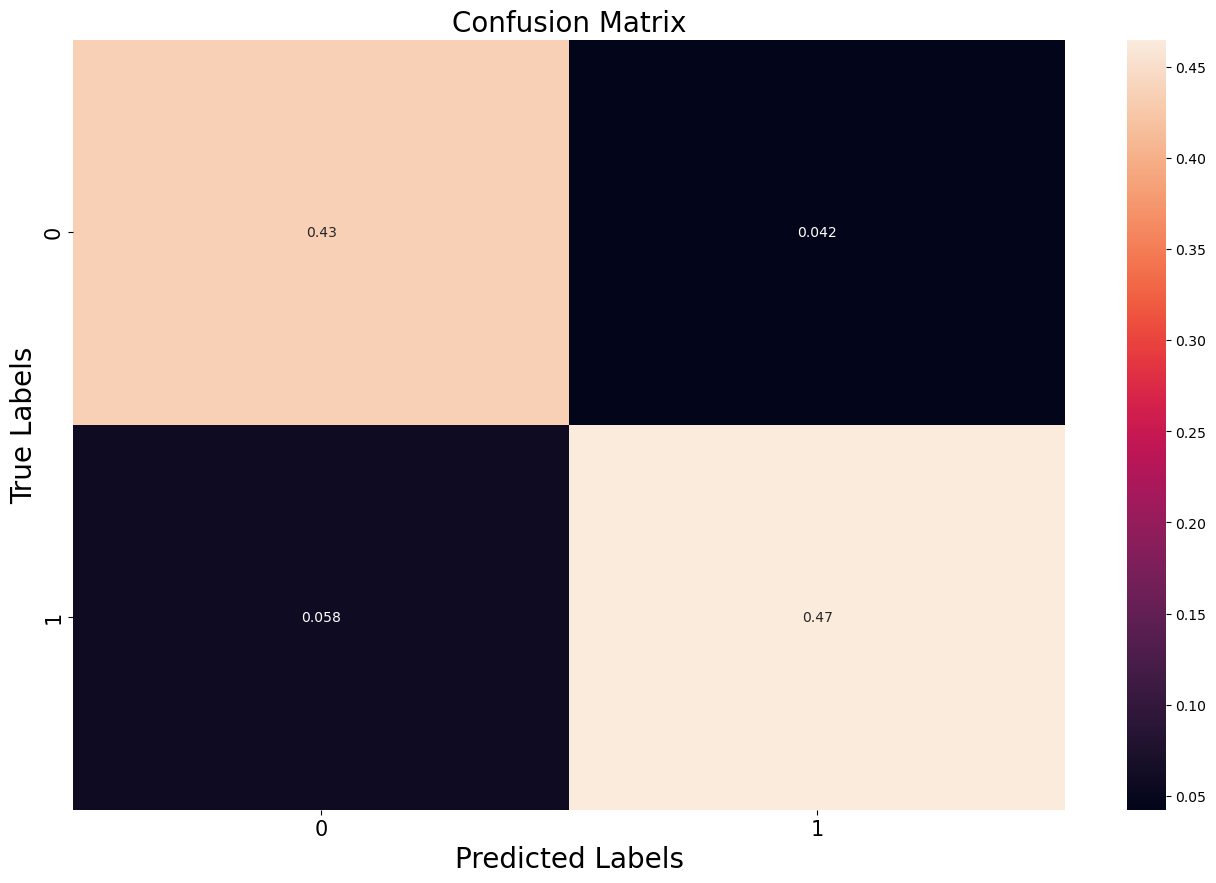

In [12]:
matrix = confusion_matrix(binary_predictions, y_test, normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

print('Accuracy on testing set:', accuracy_score(binary_predictions, y_test))
print('Precision on testing set:', precision_score(binary_predictions, y_test))
print('Recall on testing set:', recall_score(binary_predictions, y_test))

In [13]:
prd_df = pd.read_csv('C:/Users/outlul/Desktop/Πτυχιακη/Code/Datasets/HugeDatasetPredictSample.csv')

val_text = prd_df['text']
val_label = prd_df['label']

In [14]:
val_text_bow = vectorizer.transform(val_text)

val_text_bow = preprocessing.normalize(val_text_bow)

In [15]:
pred = DTC.predict(val_text_bow)

In [16]:
binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0) 

Accuracy on testing set: 0.6438
Precision on testing set: 0.7926634768740032
Recall on testing set: 0.4604409857328145


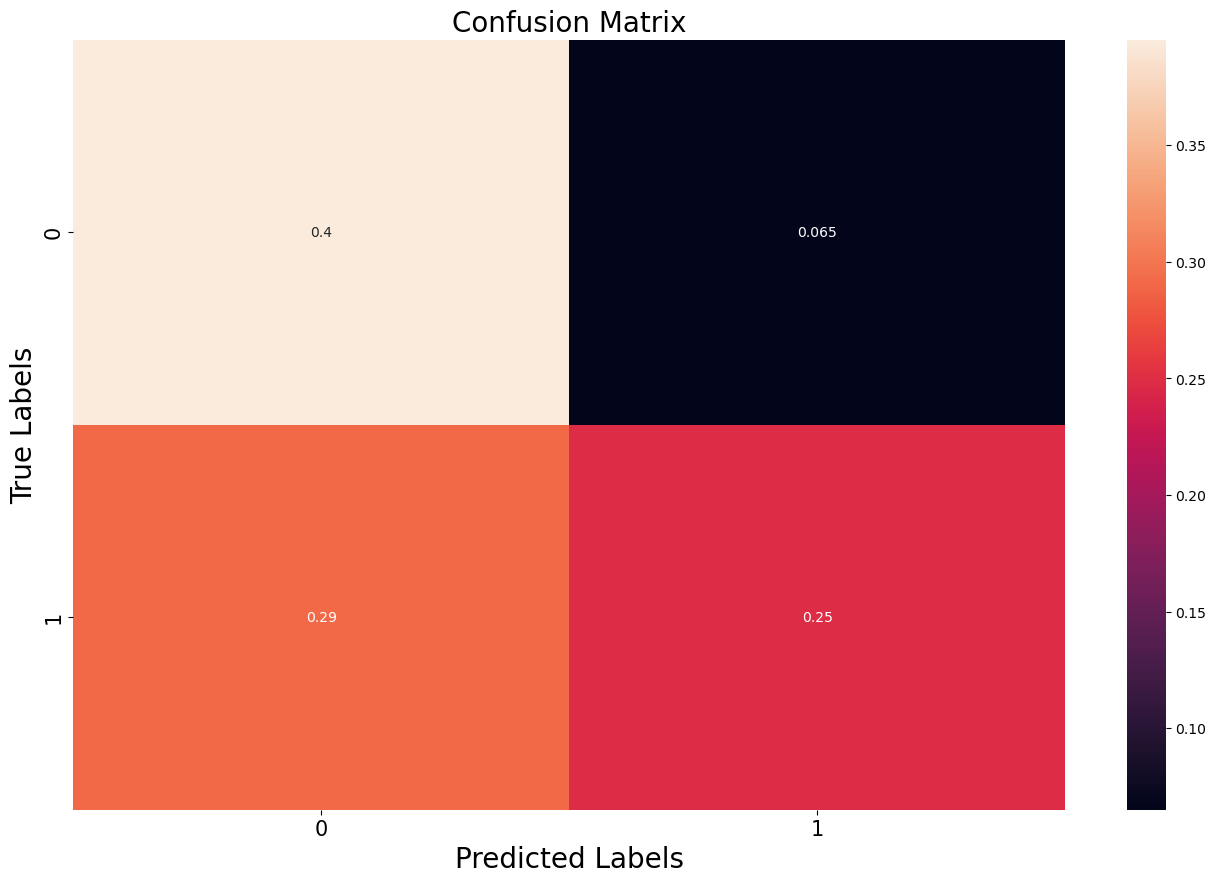

In [17]:
matrix = confusion_matrix(binary_predictions, val_label, normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

print('Accuracy on testing set:', accuracy_score(binary_predictions, val_label))
print('Precision on testing set:', precision_score(binary_predictions, val_label))
print('Recall on testing set:', recall_score(binary_predictions, val_label))

In [18]:
print("WELFake Classification Report on Fake News Corpus Validation set (Using DTC)\n")
print(classification_report(binary_predictions, val_label))

WELFake Classification Report on Fake News Corpus Validation set (Using DTC)

              precision    recall  f1-score   support

           0       0.58      0.86      0.69      4603
           1       0.79      0.46      0.58      5397

    accuracy                           0.64     10000
   macro avg       0.68      0.66      0.64     10000
weighted avg       0.69      0.64      0.63     10000



Accuracy on testing set: 0.47910653783410717
Precision on testing set: 0.8445330296127562
Recall on testing set: 0.45137726373459136


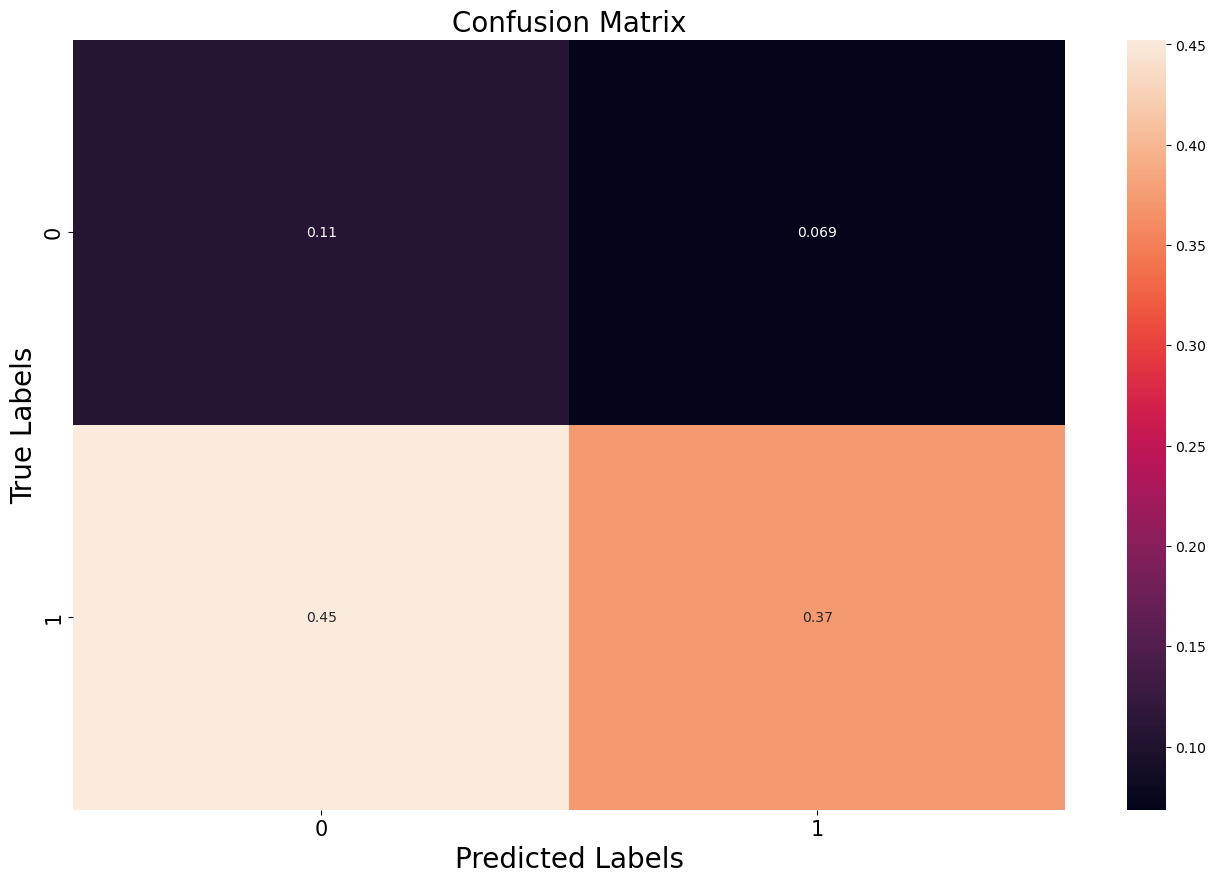

In [19]:
liar_df = pd.read_csv('C:/Users/outlul/Desktop/Πτυχιακη/Code/Datasets/Liar_preprocessed_nolemma.csv')

liar_text = liar_df['text']
liar_label = liar_df['Label']

liar_text_bow = vectorizer.transform(liar_text)

liar_text_bow = preprocessing.normalize(liar_text_bow)

pred_liar = DTC.predict(liar_text_bow)

binary_predictions_liar = []

for i in pred_liar:
    if i >= 0.5:
        binary_predictions_liar.append(1)
    else:
        binary_predictions_liar.append(0) 
        
matrix = confusion_matrix(binary_predictions_liar, liar_label, normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

print('Accuracy on testing set:', accuracy_score(binary_predictions_liar, liar_label))
print('Precision on testing set:', precision_score(binary_predictions_liar, liar_label))
print('Recall on testing set:', recall_score(binary_predictions_liar, liar_label))

In [20]:
print("WELFake Classification Report on LIAR set (Using DTC)\n")
print(classification_report(binary_predictions_liar, liar_label))

WELFake Classification Report on LIAR set (Using DTC)

              precision    recall  f1-score   support

           0       0.19      0.61      0.29      1398
           1       0.84      0.45      0.59      6571

    accuracy                           0.48      7969
   macro avg       0.52      0.53      0.44      7969
weighted avg       0.73      0.48      0.54      7969

